In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('../data/jakarta_traffic_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['Hari_Nama'] = df['Date'].dt.day_name()
df['Is_Weekend'] = df['Hari_Nama'].isin(['Saturday', 'Sunday'])


List of Unique Locations

In [8]:
df['Location'].unique()

array(['Thamrin-Sudirman', 'Gatot_Subroto', 'Kuningan_Area',
       'Senayan_Circle'], dtype=object)

Total Vehicles per Location

In [9]:
df.groupby('Location')['Vehicle_Count'].sum().sort_values(ascending=False)


Location
Thamrin-Sudirman    118410.0
Senayan_Circle      104600.0
Gatot_Subroto        92390.0
Kuningan_Area        71890.0
Name: Vehicle_Count, dtype: float64

In [10]:
df.groupby('Location')['Vehicle_Count'].sum().astype(int).sort_values(ascending=False)


Location
Thamrin-Sudirman    118410
Senayan_Circle      104600
Gatot_Subroto        92390
Kuningan_Area        71890
Name: Vehicle_Count, dtype: int64

found Not a Number (NaN)

In [12]:
df['Vehicle_Count'].isna().sum()
df[df['Vehicle_Count'].isna()]



,Date,Location,Hour,Vehicle_Count,Average_Speed_kmh,Weather_Condition,Is_Weekend,Road_Type,Hari_Nama
284,2024-01-16,Thamrin-Sudirman,12,NaN,25.8,Sunny,False,Main_Road,Tuesday


In [13]:
df['Vehicle_Count'] = df['Vehicle_Count'].fillna(0)


In [14]:
df['Vehicle_Count'] = df['Vehicle_Count'].astype(int)


Delete Rows with NaN, discard incomplete data

In [16]:
df['Vehicle_Count'].isna().sum()


np.int64(0)

In [17]:
df.groupby('Location')['Vehicle_Count'].sum().astype(int).sort_values(ascending=False)

Location
Thamrin-Sudirman    118410
Senayan_Circle      104600
Gatot_Subroto        92390
Kuningan_Area        71890
Name: Vehicle_Count, dtype: int64

Average Speed ​​per Location

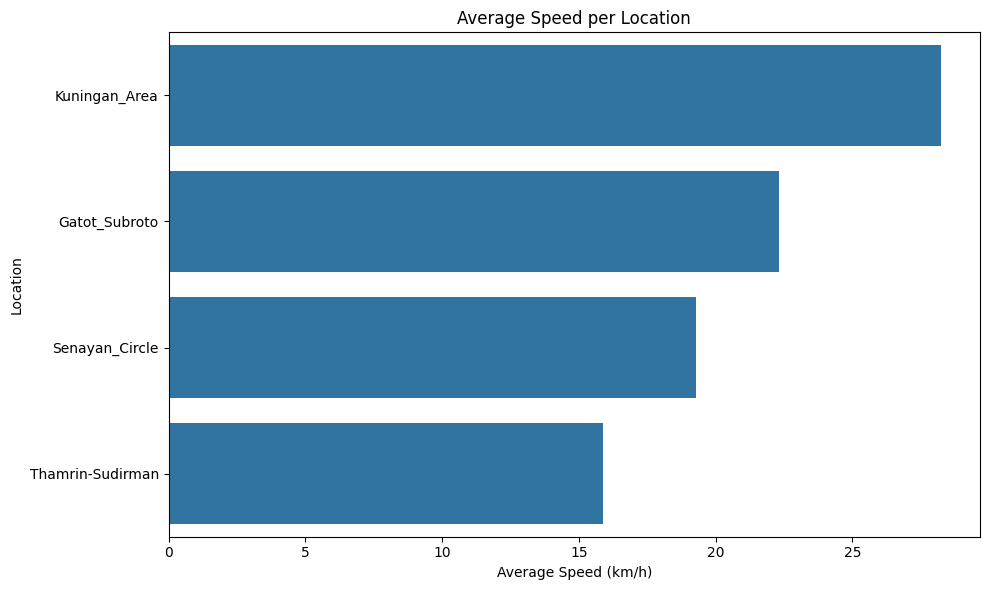

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x='Average_Speed_kmh', y='Location',
            data=df.groupby('Location')['Average_Speed_kmh'].mean().reset_index().sort_values('Average_Speed_kmh', ascending=False))
plt.title('Average Speed per Location')
plt.xlabel('Average Speed (km/h)')
plt.ylabel('Location')
plt.tight_layout()
plt.show()


Hourly Pattern by Location (Optional)

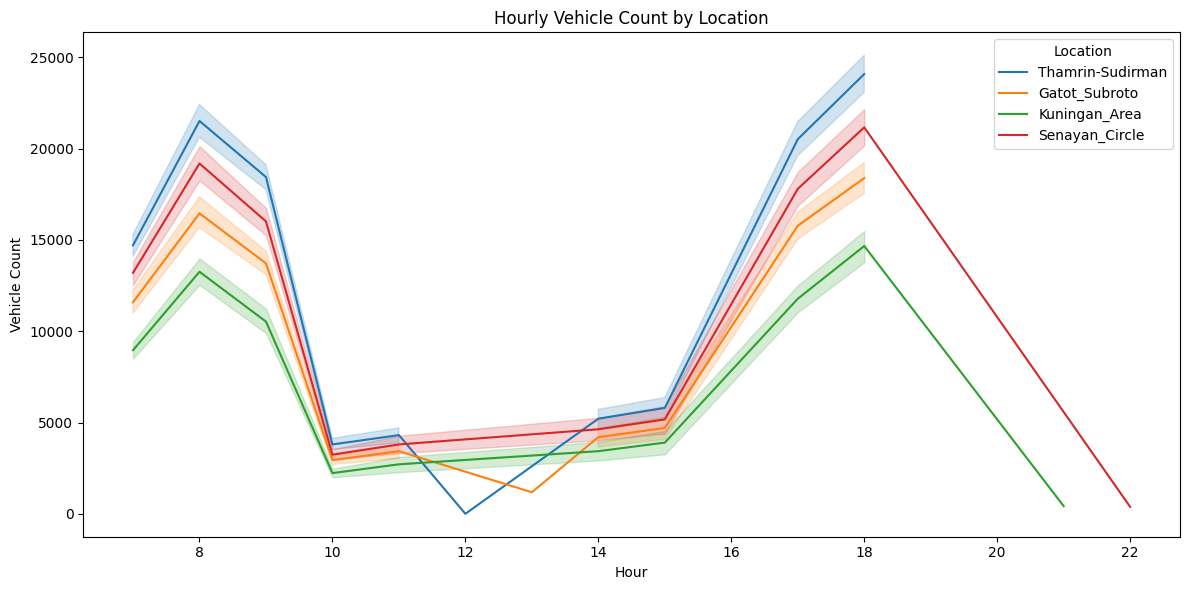

In [20]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Hour', y='Vehicle_Count', hue='Location', data=df, estimator='sum')
plt.title('Hourly Vehicle Count by Location')
plt.ylabel('Vehicle Count')
plt.xlabel('Hour')
plt.tight_layout()
plt.show()


# 🏙️ Traffic Comparison by Location (Jakarta)

## 📊 1. Hourly Vehicle Count by Location

![Hourly Vehicle Count](../output/hourly_pattern_by_location.png)

### 🔍 Insight:
- All locations show a strong **rush hour pattern** at **07:00–09:00** and **17:00–19:00**
- **Thamrin–Sudirman** has the **highest volume**, especially during peak hours
- **Kuningan Area** consistently has the **lowest traffic**, indicating a less congested route

---

## 🚗 2. Average Speed per Location

![Average Speed per Location](../output/average_speed_per_location.png)

### 🔍 Insight:
- **Kuningan Area** has the **highest average speed**, likely due to lower traffic
- **Thamrin–Sudirman** has the **slowest average speed**, confirming its role as a high-traffic corridor
- Other areas show a moderate balance between volume and speed

---

## 🧠 Summary

| Location           | Avg. Speed (km/h) | Traffic Volume | Notes                        |
|--------------------|-------------------|----------------|------------------------------|
| Thamrin-Sudirman   | Low               | High           | High congestion zone         |
| Gatot Subroto      | Medium            | High           | Busy during rush hours       |
| Senayan Circle     | Medium-Low        | Medium         | Moderate traffic flow        |
| Kuningan Area      | High              | Low            | Least congested among all    |

---

## 📌 Recommendation

> Use this insight to prioritize traffic control, public transport routing, or adaptive signal timing on **Thamrin-Sudirman** and **Gatot Subroto**, especially during rush hours.
